# **FrodoBots Gaming Dataset**

---

## Data Analysis

Find all control files in "data_260523" file, concat all control files into one table and save as "combined_control.csv"

In [1]:
import os
import pandas as pd

combined_control_df = pd.DataFrame()

# Path to data_260523 directory
data_directory = './data/data_260523'

# Iterate through all directories and subdirectories
for root, dirs, files in os.walk(data_directory):
    for file in files:
        # Check if the file is a control file
        if file.startswith('control'):
            # Full file path
            file_path = os.path.join(root, file)
            # Read the csv file into a dataframe
            try:
                df = pd.read_csv(file_path, on_bad_lines='skip')
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
                continue
            # Parse directory path to get the robot id and session id
            path_parts = root.split('/')
            robot_id = path_parts[-2]
            session_id = path_parts[-1]
            # Add robot id and session id to the dataframe
            df['Robot_ID'] = robot_id
            df['Session'] = session_id
            # Concatenate the dataframe with the combined dataframe
            combined_control_df = pd.concat([combined_control_df, df])

# Save the combined dataframe as a csv file
combined_control_df.to_csv('./data/combined_control.csv', index=False)

In [3]:
# read combined_control_df
import pandas as pd

combined_control_df = pd.read_csv('./data/combined_control.csv')
combined_control_df

speed  angular  rpm_1  rpm_2  rpm_3  rpm_4     timestamp  \
0         0.45      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
1         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
2         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
3         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
4         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
...        ...      ...    ...    ...    ...    ...           ...   
8468211   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468212   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468213   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468214   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468215    NaN      NaN    NaN    NaN    NaN    NaN           NaN   

               Robot_ID         Session  
0        frodobot2e6a30  20230404102851  
1        frodobot2e6a30  20230404102851  
2        frodobot2e6a30  20230404102851  
3        frodobot2e6a30  20230404102851  
4        frodobot2e6a30  20230404102851  
...                 ...             ...  
8468211  frodobot31cdee  20230519033727  
8468212  frodobot31cdee  20230519033727  
8468213  frodobot31cdee  20230519033727  
8468214  frodobot31cdee  20230519033727  
8468215  frodobot31cdee  20230519033727  

[8468216 rows x 9 columns]

In [4]:
# Calculate "actual_speed" and add to "combined_control_df"
combined_control_df['actual_speed'] = (combined_control_df['rpm_1'] + combined_control_df['rpm_2'] + combined_control_df['rpm_3'] + combined_control_df['rpm_4']) / 4 * 3.14 * 0.125 * 60.0 / 1000.0
combined_control_df

speed  angular  rpm_1  rpm_2  rpm_3  rpm_4     timestamp  \
0         0.45      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
1         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
2         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
3         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
4         0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
...        ...      ...    ...    ...    ...    ...           ...   
8468211   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468212   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468213   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468214   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
8468215    NaN      NaN    NaN    NaN    NaN    NaN           NaN   

               Robot_ID         Session  actual_speed  
0        frodobot2e6a30  20230404102851           0.0  
1        frodobot2e6a30  20230404102851           0.0  
2        frodobot2e6a30  20230404102851           0.0  
3        frodobot2e6a30  20230404102851           0.0  
4        frodobot2e6a30  20230404102851           0.0  
...                 ...             ...           ...  
8468211  frodobot31cdee  20230519033727           0.0  
8468212  frodobot31cdee  20230519033727           0.0  
8468213  frodobot31cdee  20230519033727           0.0  
8468214  frodobot31cdee  20230519033727           0.0  
8468215  frodobot31cdee  20230519033727           NaN  

[8468216 rows x 10 columns]

#### Total Duration for Each City

In [5]:
# location data
location_df = pd.read_csv('./data/location.csv')
location_df['city'].unique()

array(['London', 'Bern', 'Liu Zhou Shi', 'California', 'Madrid',
       'Stockholm', 'Vienna', 'Berlin', 'Wuhan', 'Taipei', 'Singapore',
       'Belgium', 'San Diego', 'Bobigny', 'Paris'], dtype=object)

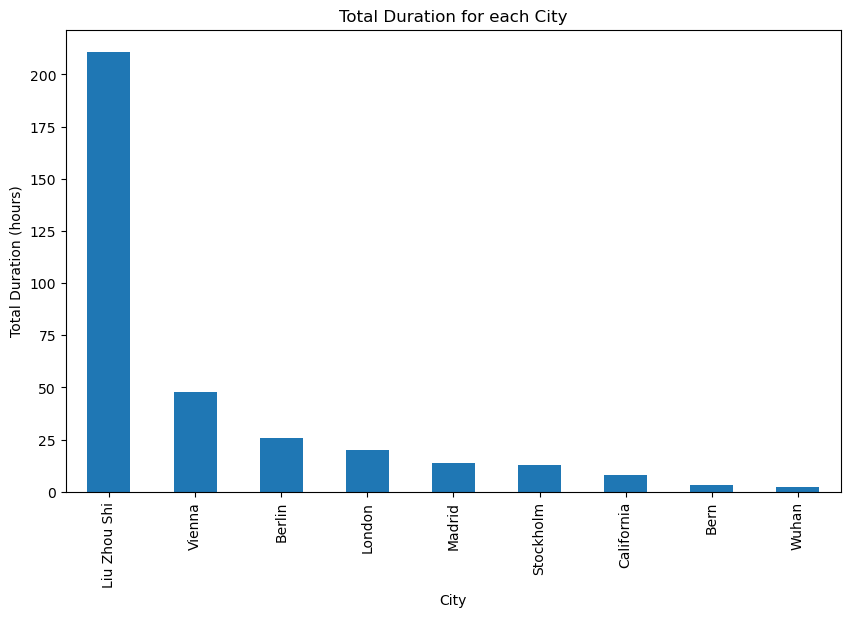

In [6]:
import matplotlib.pyplot as plt

# Create a new DataFrame that records the start and end time of each unique session
session_df = combined_control_df.groupby('Session').agg({'timestamp': ['min', 'max'], 'Robot_ID': 'first'})

# Flatten the MultiIndex in columns
session_df.columns = ['_'.join(col).strip() for col in session_df.columns.values]

# Reset the index
session_df.reset_index(inplace=True)

# Convert the 'timestamp_min' and 'timestamp_max' columns to datetime format
session_df['timestamp_min'] = pd.to_datetime(session_df['timestamp_min'], unit='s')
session_df['timestamp_max'] = pd.to_datetime(session_df['timestamp_max'], unit='s')

# Calculate the duration for each of these unique sessions
session_df['session_hours'] = (session_df['timestamp_max'] - session_df['timestamp_min']).dt.total_seconds() / 3600  # convert seconds to hours

# Merge session data with location data
merged_df = pd.merge(session_df, location_df, left_on='Robot_ID_first', right_on='bot_id', how='left')

# Group by city and sum the session_hours
total_duration_per_city = merged_df.groupby('city')['session_hours'].sum()

# Sort the cities by total duration
total_duration_per_city_sorted = total_duration_per_city.sort_values(ascending=False)

# Create a bar plot of total duration per city
total_duration_per_city_sorted.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Total Duration (hours)')
plt.title('Total Duration for each City')
plt.show()

#### Session Duration

In [7]:
# calculate session duration
combined_control_df['timestamp'] = pd.to_datetime(combined_control_df['timestamp'], unit='s')  # convert unix timestamp to datetime
grouped = combined_control_df.groupby('Session')
session_duration = grouped['timestamp'].max() - grouped['timestamp'].min()

# convert duration to seconds for easier analysis and comparison
session_duration_in_seconds = session_duration.dt.total_seconds()
# convert duration to minutes for easier analysis and comparison
session_duration_in_minutes = session_duration.dt.total_seconds() / 60

# convert Series to DataFrame and rename the column
session_duration_df = session_duration_in_minutes.to_frame().reset_index()
session_duration_df.columns = ['Session', 'Session Minutes']

# Calculate the total number of sessions
total_sessions = len(session_duration_df)

# Calculate the total number of hours
total_hours = session_duration_df['Session Minutes'].sum() / 60

print(f'Total number of sessions: {total_sessions}')
print(f'Total duration in hours: {total_hours}')

Total number of sessions: 1864
Total duration in hours: 344.5340849968355


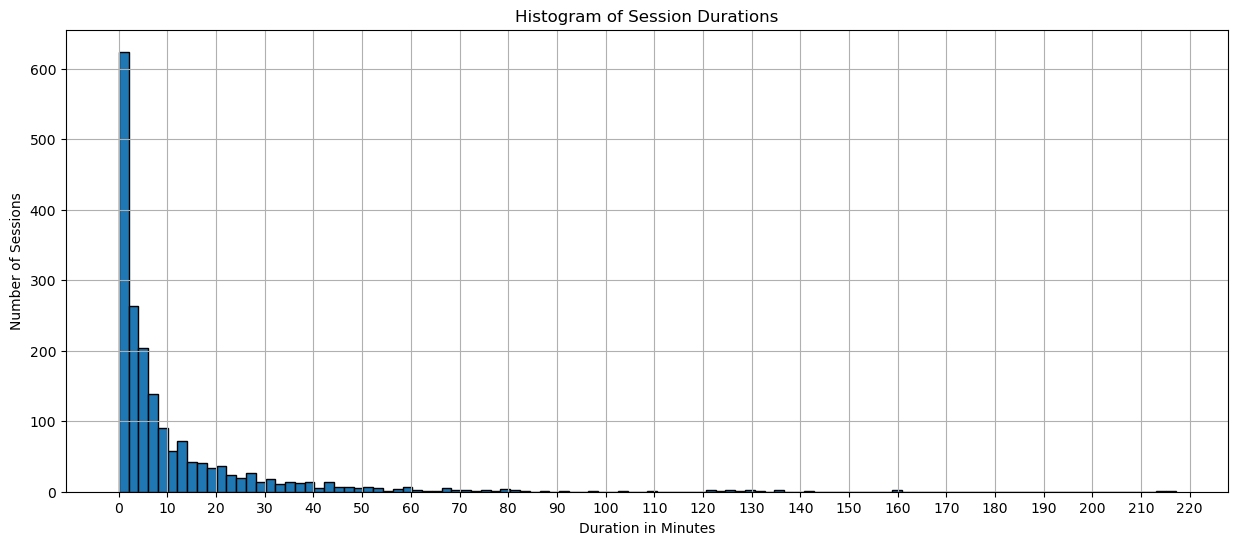

In [8]:
import numpy as np

# Estimate the maximum session duration in minutes
max_duration = session_duration_df['Session Minutes'].max()

plt.figure(figsize=(15, 6))  # Adjust the figure size

# Plot the histogram with one bin per 2 minutes
session_duration_df['Session Minutes'].hist(bins=int(max_duration / 2), edgecolor='black')

# Add x-axis ticks
plt.xticks(np.arange(0, max_duration + 10, 10))  # +10 in max_duration to ensure the last tick is included

plt.title("Histogram of Session Durations")
plt.xlabel("Duration in Minutes")
plt.ylabel("Number of Sessions")
plt.show()

#### Speed

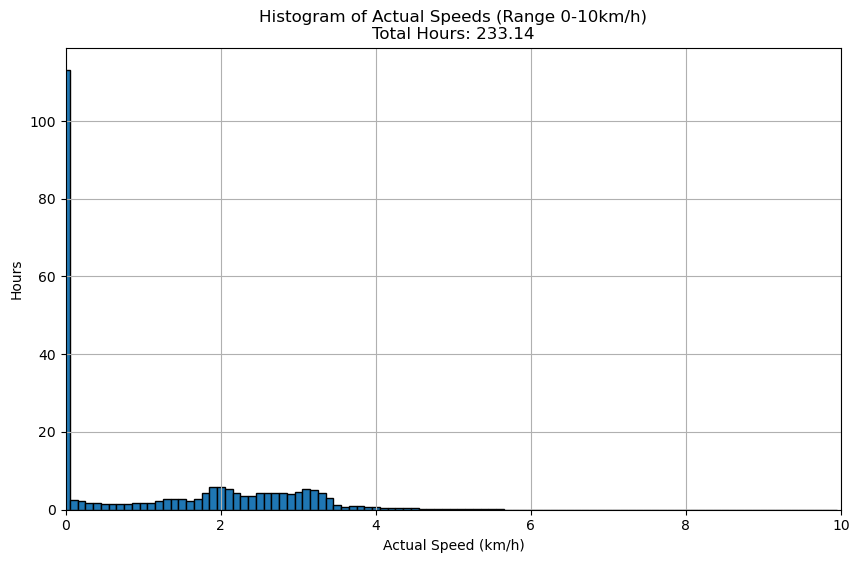

In [9]:
# Define the number of bins
num_bins = 100

# Calculate histogram
counts, bin_edges = np.histogram(combined_control_df['actual_speed'], bins=num_bins, range=(0, 10))

# Convert counts to hours
counts_in_hours = (counts * 0.1) / 3600

# Calculate total hours
total_hours = counts_in_hours.sum()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], counts_in_hours, width = 0.1, edgecolor='black')
plt.xlabel('Actual Speed (km/h)')
plt.ylabel('Hours')
plt.title(f'Histogram of Actual Speeds (Range 0-10km/h)\nTotal Hours: {total_hours:.2f}')
plt.grid(True)

# Set x-axis range
plt.xlim(0, 10)

plt.show()


Range 0.1-10 km/h

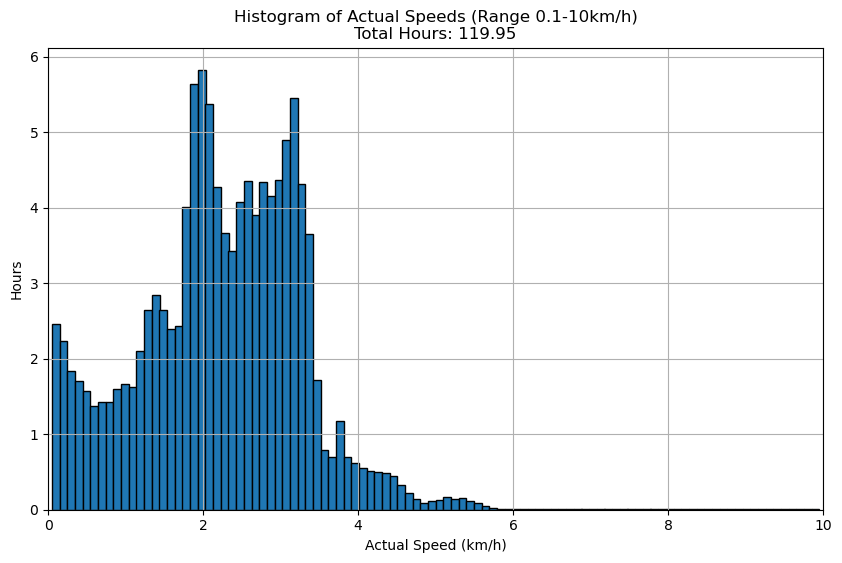

In [10]:
# Calculate histogram
counts, bin_edges = np.histogram(combined_control_df['actual_speed'], bins=num_bins, range=(0.1, 10))

# Convert counts to hours
counts_in_hours = (counts * 0.1) / 3600

# Calculate total hours
total_hours = counts_in_hours.sum()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], counts_in_hours, width = 0.1, edgecolor='black')
plt.xlabel('Actual Speed (km/h)')
plt.ylabel('Hours')
plt.title(f'Histogram of Actual Speeds (Range 0.1-10km/h)\nTotal Hours: {total_hours:.2f}')
plt.grid(True)

# Set x-axis range
plt.xlim(0, 10)

plt.show()